# 5. Dinâmica de Corpos Rígidos
Professor Paulo Victor <br>
E-mail: paulo.gomes@cefet-rj.br <br>
CEFET-RJ Campus Angra dos Reis Sala 6E


## 5.1 Distribuição de Massa

O centro de massa de um corpo rígido pode ser obtido por:
$$ \vec{p}{}^{*/O} = \dfrac{1}{m} \int_B \vec{p} dm$$
Ou:
$$ \vec{p}{}^{*/O} = \dfrac{1}{m} \int_B \rho \vec{p} dV$$

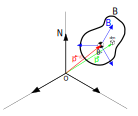

In [1]:
from IPython.display import SVG
SVG('batata04.svg')

O **Tensor de Inércia** de um corpo rígido pode ser obtido por:
$$ \underline{I}^{B/O} = \int_{B} \left(p^{2} \underline{1} - \vec{p} \otimes \vec{p} \right)dm $$

Observa-se que os momentos de inércia de várias figuras elementares podem ser obtidos em tabelas. 

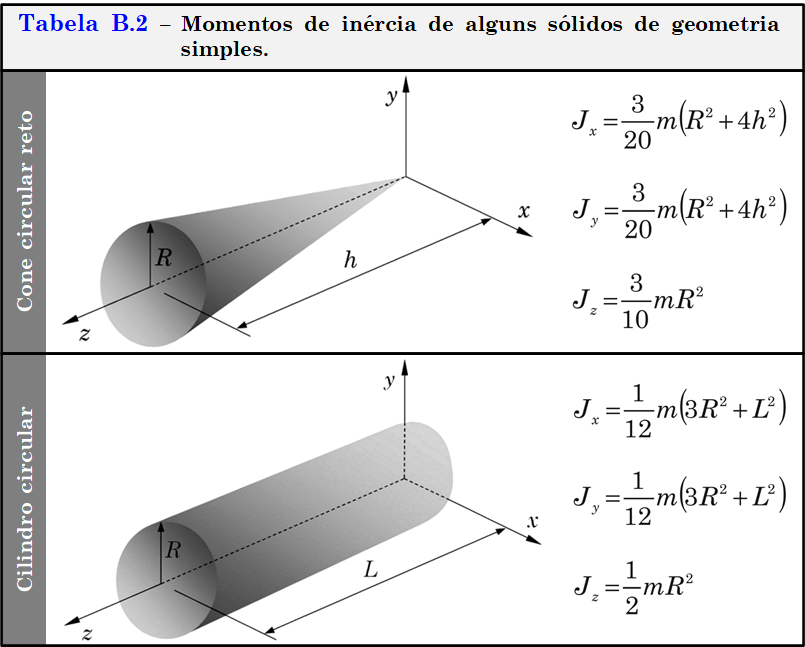

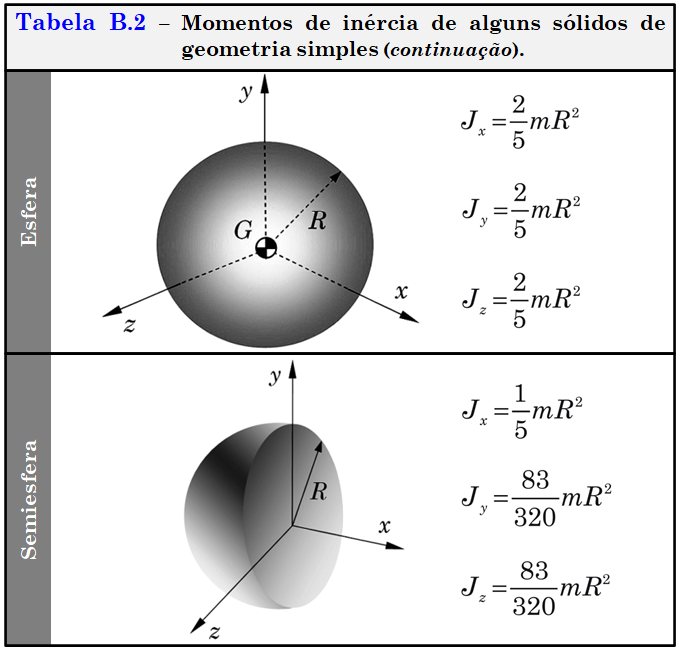

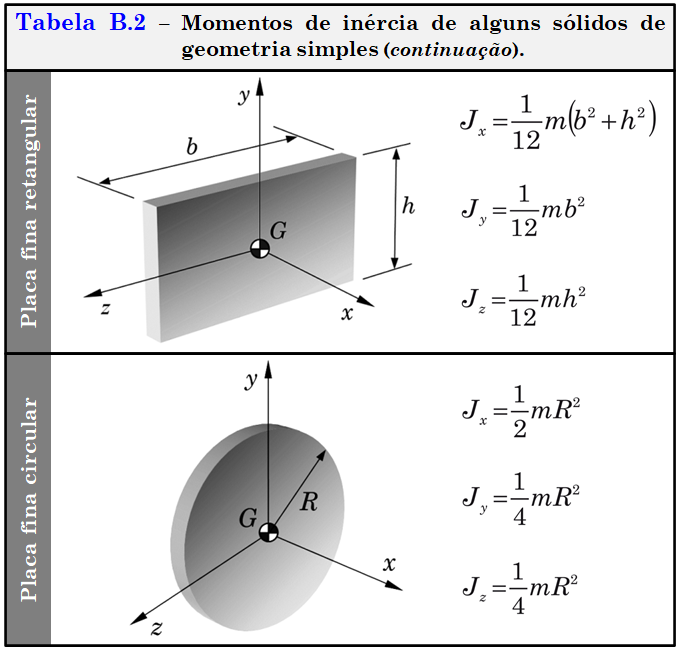

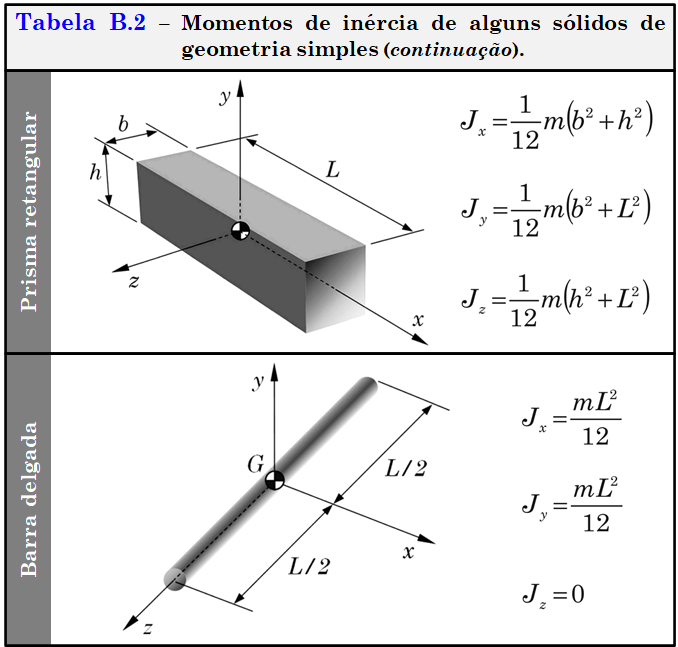

Caso se necessite expressar o Tensor de Inércia em relação a um ponto diferente do centro de massa, podemos utilizar o teorema dos eixos paralelos:
$$ \underline{I}^{B/O} = \underline{I}^{B/B^*} + \underline{I}^{B^*/O} $$
Ou, escrevendo como vetores de inércia:
$$ \vec{I}{}^{B/O} = \vec{I}{}^{B/B^*} + \vec{I}{}^{B^*/O} $$

In [2]:
import sympy as sy
import sympy.physics.mechanics as me

### Exemplo 1
Usar o teorema dos eixos paralelos para escrever o tensor de inércia em relação ao ponto $O$:

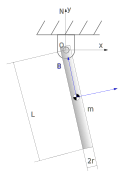

In [3]:
SVG('pend_fis.svg')

In [4]:
m,r,L = sy.symbols('m r L')
theta = me.dynamicsymbols('theta')

In [5]:
N = me.ReferenceFrame('N')

In [6]:
B = me.ReferenceFrame('B')
B.orient(N,'Axis',[theta,N.z])

In [7]:
O = me.Point('O')
O.set_vel(N,0)

Vamos definir o vetor posição do centro de massa em relação ao ponto $O$ ,$\vec{p}{}^{CM/O}$, como:

In [8]:
p = -L/2*B.y
p

- L/2*B.y

In [9]:
CM = me.Point('CM')
CM.set_pos(O,p)
CM.set_vel(N,p.dt(N))

**Criando o tensor de inércia do cilindo em relação ao seu centro de massa:** <br>
Para o cilindro temos que: 
$$ I_{xx}^{*} = I_{yy}^{*} = \dfrac{mr^2}{4} + \dfrac{mL^2}{12} \qquad I_{zz}^{*} = \dfrac{mr^2}{2} $$

Usando a tabela de momentos de inércia:

In [10]:
Ixx = m*r*2/4 + m*L**2/12
Izz = Ixx
Iyy = m*r**2/2

In [11]:
I = me.inertia(B,Ixx,Iyy,Izz)
I

(L**2*m/12 + m*r/2)*(B.x|B.x) + m*r**2/2*(B.y|B.y) + (L**2*m/12 + m*r/2)*(B.z|B.z)

Podemos resolver esse exemplo no python de dois modos diferentes. Para a primeira maneira, vamos obter o tensor de inércia de um ponto no CM em relação ao ponto O. <br>
Sabemos que:
$$ \underline{I}^{CM/O} = m \left( \left(p^{CM/O} \right)^2 \underline{1} - \vec{p}{}^{CM/O} \otimes \vec{p}{}^{CM/O} \right)$$

In [12]:
I2 = me.inertia_of_point_mass(m, p, B)

Podemos somar e subtrair tensores de inércia. Deste modo, resolvemos o exemplo utilizando a equação do teorema dos eixos paralelos. 

In [13]:
I3 = I + I2
I3

(L**2*m/3 + m*r/2)*(B.x|B.x) + m*r**2/2*(B.y|B.y) + (L**2*m/3 + m*r/2)*(B.z|B.z)

No python, podemos definir um corpo rígido da seguinte maneira:<br>
Comando me.RigidBody('B',P,C,M,(I,O))<br>

| Símbolo | Significado |
|---------|-------------|
| B | Nome do corpo |
| P | O ponto que representa o centro de massa |
| C | Sistema de referência fixo no corpo |
| m | Massa do corpo |
| I | Tensor de inércia |
| O | Ponto em que o tensor de inércia está definido |

In [14]:
Pend = me.RigidBody('Pend',CM,B,m,(I,CM))

Resolvendo o nosso exemplo:

In [15]:
Pend.parallel_axis(O)

(L**2*m/3 + m*r/2)*(B.x|B.x) + m*r**2/2*(B.y|B.y) + (L**2*m/3 + m*r/2)*(B.z|B.z)

## 5.2 Equações de Movimento

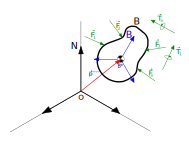

In [16]:
SVG('batata05.svg')

Podemos utilizar a Segunda Lei de Newton em um corpo rígido igualando a **resultante das forças** ao produto da massa pela aceleração do **centro de massa**. Ou ainda, igualar a resultante das forças à derivada temporal da quantidade de movimento linear do centro de massa. 
$$ \sum_{i=1}^{n} \vec{F}_{i} = m{}^{N} \vec{a}{}^{*} $$
ou:
$$ \sum_{i=1}^{n} \vec{F}_{i} = m {}^{N} \dot{\vec{G}}{}^{*}$$
Onde $N$ é um referencial inercial. Podemos reescrever a equação vetorial em 3 equações escalares:
$$ F_x = m {}^{N}a_{x}^{*} $$
$$ F_y = m {}^{N}a_{y}^{*} $$
$$ F_z = m {}^{N}a_{z}^{*} $$

Para um corpo rígido, precisaremos complementar as **Equações de Movimento de Newton** usando as **Equações de Movimento de Euler**. <br>
Vimos que o vetor quantidade de movimento angular pode ser definido como:
$$ {}^{N} {\vec{H}}{}^{B/*} = \underline{I}{}^{B/*} . {}^{N}\vec{\omega}{}^{B}$$
Como vimos anteriormente, o momento da resultante das forças mais o somatório de torques é igual a derivada temporal da quantidade de movimento angular. 
$$ \vec{M}{}^{F/*} + \sum_{i=1}^{n}\vec{T}_{n} =  {}^{N} \dot{\vec{H}}{}^{B/*} $$
Onde:
$${}^{N} \dot{\vec{H}}{}^{B/*}  = \dfrac{{}^{N} d \left( \underline{I}^{B/*}.{}^{N}\vec{\omega}^{B} \right)}{dt}  = \underline{I}^{B/*}.{}^{N}\vec{\alpha}{}^{B}+ {}^{N}\vec{\omega}{}^{B} \times \underline{I}^{B/*} . {}^{N}\vec{\omega}{}^{B} $$ 

De modo geral, vamos considerar a velocidade angular e a aceleração angular como:
$${}^{N} \vec{\omega}{}^{B} = \omega_1 \mathbf{\hat{b}_x} + \omega_2 \mathbf{\hat{b}_y} + \omega_3 \mathbf{\hat{b}_z} $$
$${}^{N} \vec{\alpha}{}^{B} = \alpha_1 \mathbf{\hat{b}_x} + \alpha_2 \mathbf{\hat{b}_y} + \alpha_3 \mathbf{\hat{b}_z} $$
Deste modo, teremos:
$${}^{N} \dot{\vec{H}}{}^{B/*}  = I_{xx}\alpha_1 \mathbf{\hat{b}_x}  + I_{yy}\alpha_2 \mathbf{\hat{b}_y} + I_{zz}\alpha_3 \mathbf{\hat{b}_z} + \left( \omega_1 \mathbf{\hat{b}_x} + \omega_2 \mathbf{\hat{b}_y} + \omega_3 \mathbf{\hat{b}_z} \right) \times \left( I_{xx} \omega_1 \mathbf{\hat{b}_x} + I_{yy} \omega_2 \mathbf{\hat{b}_y} + I_{zz} \omega_3 \mathbf{\hat{b}_z} \right) $$
Resolvendo o produto vetorial e passando para a forma escalar:
$$ M_x^* = I_{xx}^* \alpha_1 + \left(I_{zz}^* - I_{yy}^* \right)\omega_3 \omega_2 $$
$$ M_y^* = I_{yy}^* \alpha_2 + \left(I_{xx}^* - I_{zz}^* \right)\omega_1 \omega_3 $$
$$ M_z^* = I_{zz}^* \alpha_3 + \left(I_{yy}^* - I_{xx}^* \right)\omega_2 \omega_1 $$

Para um **problema de corpos rígidos em duas dimensões** as Equações de Movimento de Newton podem ser reduzidas para duas equações e as Equações de Movimento de Euler podem ser reduzidas para uma única equação. Como por exemplo:
$$ F_x = m {}^{N}a_{x}^{*} $$
$$ F_y = m {}^{N}a_{y}^{*} $$
$$ M_z^* = I_{zz}^* \alpha_3 $$

Voltando ao exemplo do pêndulo de massa distribuída:

In [17]:
G = Pend.linear_momentum(N)
G

L*m*theta'/2*B.x

In [18]:
H = Pend.angular_momentum(O,N)
H

(L**2*m*theta'/4 + (L**2*m/12 + m*r/2)*theta')*B.z

In [19]:
H.dt(N)

(L**2*m*theta''/4 + (L**2*m/12 + m*r/2)*theta'')*B.z

In [20]:
me.find_dynamicsymbols(H,reference_frame=N)

{Derivative(theta(t), t), theta(t)}

Ao utilizar o método de Newton-Euler precisamos fazer DCL

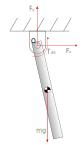

In [21]:
SVG('pend_fis2.svg')

In [22]:
g,Fx,Fy,c = sy.symbols('g Fx Fy c')
t = me.dynamicsymbols._t

In [23]:
F = Fx*N.x + Fy*N.y - m*g*N.y

In [24]:
Fstar = -G.dt(N) # Força de inércia

In [25]:
PrincDAlmbert = F + Fstar
PrincDAlmbert

Fx*N.x + (Fy - g*m)*N.y - L*m*theta''/2*B.x - L*m*theta'**2/2*B.y

In [26]:
M_O = -c*theta.diff()*N.z + p.cross(-m*g*N.y)
M_O

(-L*g*m*sin(theta)/2 - c*theta')*N.z

In [27]:
Eq = M_O + (-H.dt(N))
Eq

(-L*g*m*sin(theta)/2 - c*theta')*N.z + (-L**2*m*theta''/4 - (L**2*m/12 + m*r/2)*theta'')*B.z

In [28]:
Eqz = Eq.dot(N.z)
Eqz

-L**2*m*Derivative(theta(t), (t, 2))/4 - L*g*m*sin(theta(t))/2 - c*Derivative(theta(t), t) - (L**2*m/12 + m*r/2)*Derivative(theta(t), (t, 2))

In [29]:
print(me.mlatex(Eqz))

- \frac{L^{2} m \ddot{\theta}}{4} - \frac{L g m \operatorname{sin}\left(\theta\right)}{2} - c \dot{\theta} - \left(\frac{L^{2} m}{12} + \frac{m r}{2}\right) \ddot{\theta}


Equação de Movimento no eixo Z:
$$- \frac{L^{2} m \ddot{\theta}}{4} - \frac{L g m \operatorname{sin}\left(\theta\right)}{2} - c \dot{\theta} - \left(\frac{L^{2} m}{12} + \frac{m r}{2}\right) \ddot{\theta} = 0
$$

In [30]:
w1d = sy.solve(Eqz,theta.diff(t,2))[0]

In [31]:
from numpy import linspace

In [32]:
tn = linspace(0,20,1000) # criação de um tempo numérico

In [33]:
dic = {m:1,g:9.8,L:0.5,c:0.05,r:0.010} # Unidades no SI

Vamos definir as condições iniciais do nosso sistema

In [34]:
th0 = 0.0
w0 = 1
X0 = [th0,w0]
X0[0]

0.0

Vamos criar uma função em python para receber 2 EDOs de primeira ordem:

In [35]:
def Modelo(X,T):
    thd = X[1]
    wd = w1d.subs(dic)
    wd = wd.subs({theta.diff(t):X[1],theta:X[0]})
    return [thd,wd]

In [36]:
from scipy.integrate import odeint

In [37]:
X = odeint(Modelo,X0,tn)

In [38]:
import matplotlib.pyplot as plt

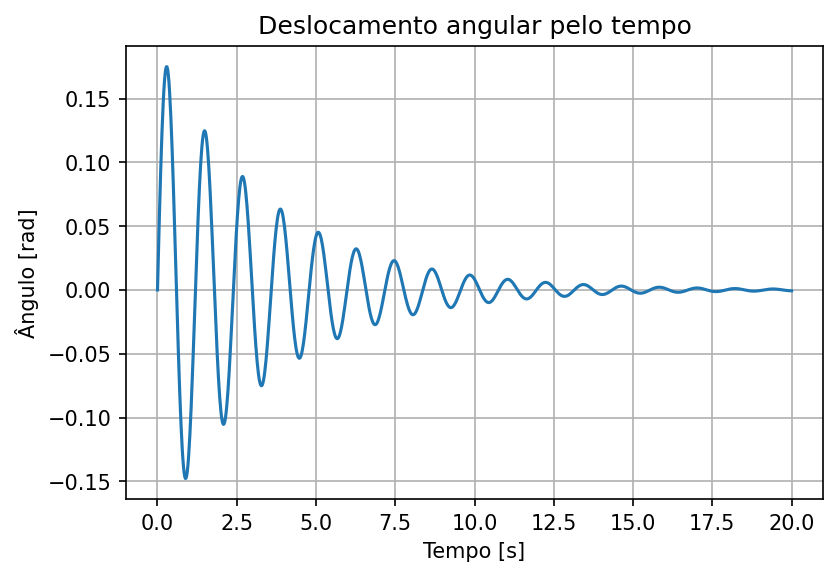

In [39]:
plt.figure(dpi=150)
plt.plot(tn,X[:,0])
plt.xlabel('Tempo [s]')
plt.ylabel('Ângulo [rad]')
plt.title('Deslocamento angular pelo tempo')
plt.grid(True)

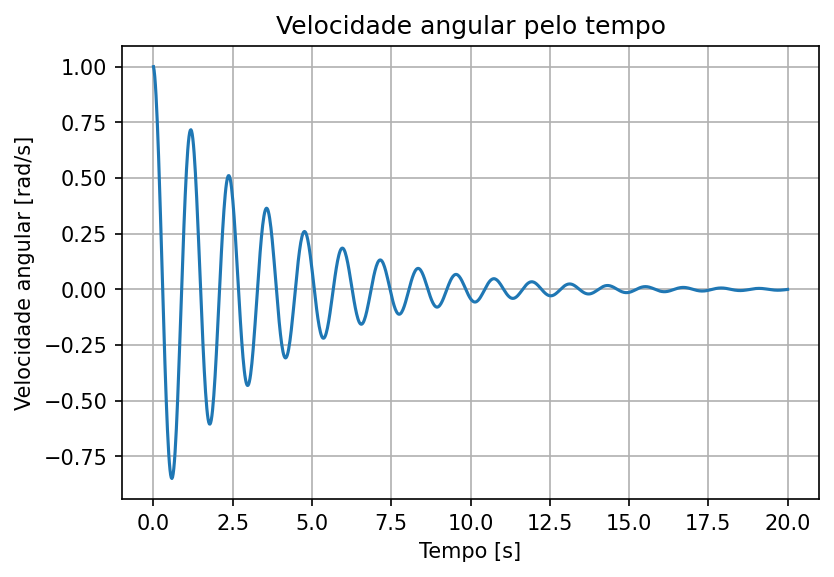

In [40]:
plt.figure(dpi=150)
plt.plot(tn,X[:,1])
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade angular [rad/s]')
plt.title('Velocidade angular pelo tempo')
plt.grid(True)

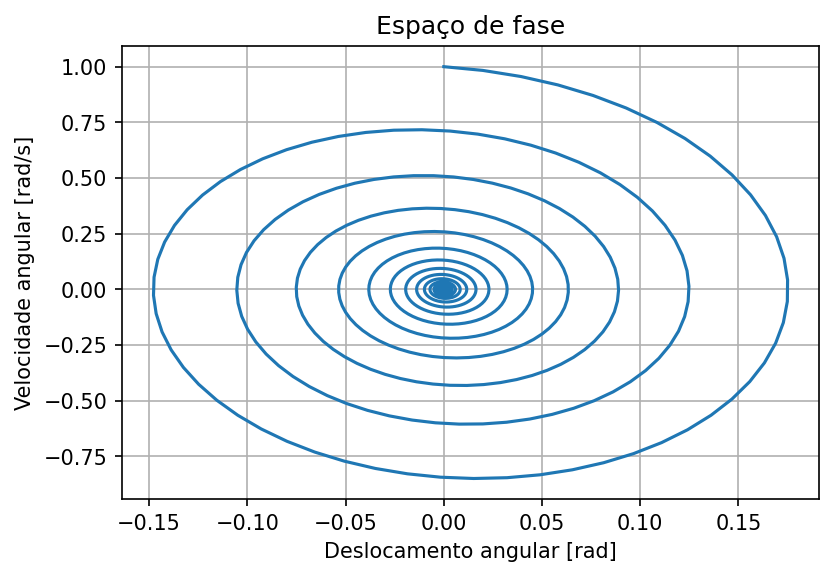

In [41]:
plt.figure(dpi=150)
plt.plot(X[:,0],X[:,1])
plt.xlabel('Deslocamento angular [rad]')
plt.ylabel('Velocidade angular [rad/s]')
plt.title('Espaço de fase')
plt.grid(True)

### Exemplo 2:

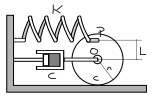

In [42]:
SVG(filename='Din_Corpo_2.svg')

In [43]:
theta = me.dynamicsymbols('theta')

In [44]:
r,L = sy.symbols('r L')

In [45]:
N = me.ReferenceFrame('N')
D = me.ReferenceFrame('D')

In [46]:
D.orient(N,'Axis',[-theta,N.z])

In [47]:
C = me.Point('C')
C.set_vel(N,0)

In [48]:
CM = me.Point('CM')
CM.set_pos(C,r*theta*N.x + r*N.y)
CM.set_vel(N,r*theta.diff(t)*N.x)

In [49]:
CM.vel(N)

r*theta'*N.x

In [50]:
CM.acc(N)

r*theta''*N.x

In [51]:
P =  me.Point('P')
p_P_C = (r + L)*D.y
P.set_pos(C,p_P_C)
P.set_vel(N,p_P_C.dt(N))
P.vel(N)

(L + r)*theta'*D.x

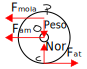

In [52]:
SVG('Din_Corpo_3.svg')

In [53]:
 k,c,m,g,Fat,Nor = sy.symbols('k c m g Fat Nor')

In [54]:
I = me.inertia(D,0,0,(m*r**2)/2)

In [55]:
Disco = me.RigidBody('Disco',CM,D,m,(I,CM))

In [56]:
G = Disco.linear_momentum(N)
G

m*r*theta'*N.x

In [57]:
Disco.angular_momentum(CM,N)

- m*r**2*theta'/2*D.z

In [58]:
H = Disco.angular_momentum(C,N)
H

- m*r**2*theta'*N.z - m*r**2*theta'/2*D.z

In [59]:
Fam = -c*CM.vel(N)
Fmola = -k*P.pos_from(C).dot(N.x)*N.x
peso = -m*g*N.y

In [60]:
R = Fam + Fmola + peso + Nor*N.y + Fat*N.x

In [61]:
T = me.cross(CM.pos_from(C),Fam) + me.cross(P.pos_from(C),Fmola) + me.cross(CM.pos_from(C),peso)

In [62]:
eqNx = me.dot(G.dt(N),N.x) - me.dot(R,N.x)
eqNy = me.dot(G.dt(N),N.y) - me.dot(R,N.y)
eqNz = me.dot(H.dt(N),N.z) - me.dot(T,N.z)

In [63]:
sy.Matrix([eqNx,eqNy,eqNz])

Matrix([
[                                      -Fat + c*r*Derivative(theta(t), t) + k*(L + r)*sin(theta(t)) + m*r*Derivative(theta(t), (t, 2))],
[                                                                                                                           -Nor + g*m],
[-c*r**2*Derivative(theta(t), t) + g*m*r*theta(t) - k*(L + r)**2*sin(theta(t))*cos(theta(t)) - 3*m*r**2*Derivative(theta(t), (t, 2))/2]])

In [64]:
thpp = sy.solve(eqNz,theta.diff(t,2))
thpp[0]

2*(-c*r**2*Derivative(theta(t), t) + g*m*r*theta(t) - k*(L + r)**2*sin(2*theta(t))/2)/(3*m*r**2)

In [65]:
parametros = {r:0.5,L:0.3,k:15,c:0.5,m:1,g:9.8}

In [66]:
thppn = thpp[0].subs(parametros)

In [67]:
t0 = 0 # tempo inicial
tf = 15 # tempo final
b = 0.01 # passo de integração
n = int(tf/b) # número de pontos

tn = linspace(t0,tf,n)
xn = 0 # deslocamento inicial
vn = 0.2 # velocidade inicial
x0 = [xn,vn]

In [68]:
def modelo(X,tn): #X[0] é o deslocamento e X[1] é a velocidade
    th_ponto = X[1]
    th_2pontos = thppn.subs({theta:X[0],theta.diff(t):X[1]})
    return [th_ponto,th_2pontos]

In [69]:
X = odeint(modelo,x0,tn)

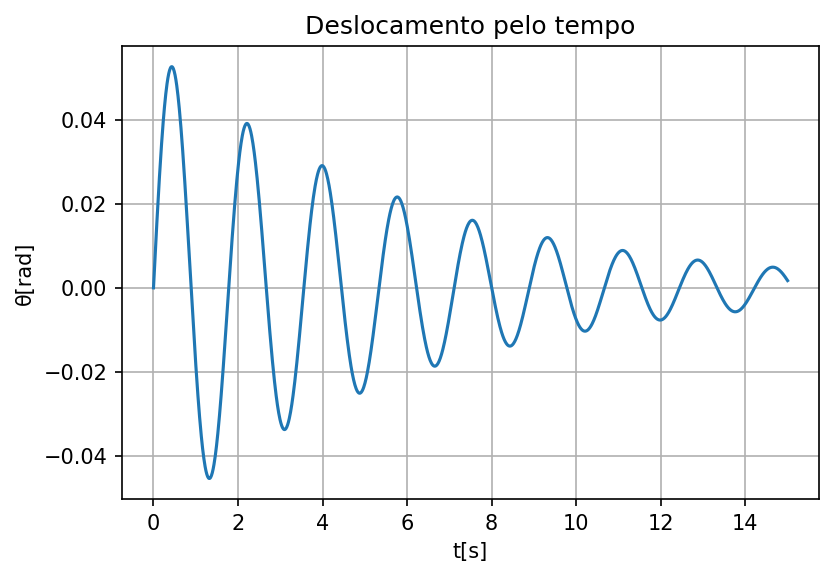

In [70]:
plt.figure(dpi=150)
plt.plot(tn,X[:,0])
plt.xlabel('t[s]')
xstr = chr(952) + '[rad]'
plt.ylabel(xstr)
plt.title('Deslocamento pelo tempo')
plt.grid(True)

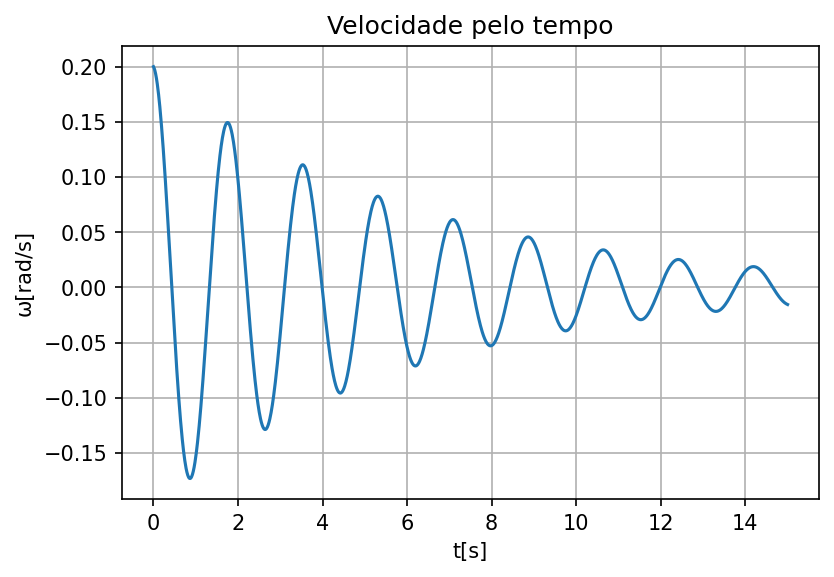

In [71]:
plt.figure(dpi=150)
plt.plot(tn,X[:,1])
plt.xlabel('t[s]')
vstr = chr(969) + '[rad/s]'
plt.ylabel(vstr)
plt.title('Velocidade pelo tempo')
plt.grid(True)

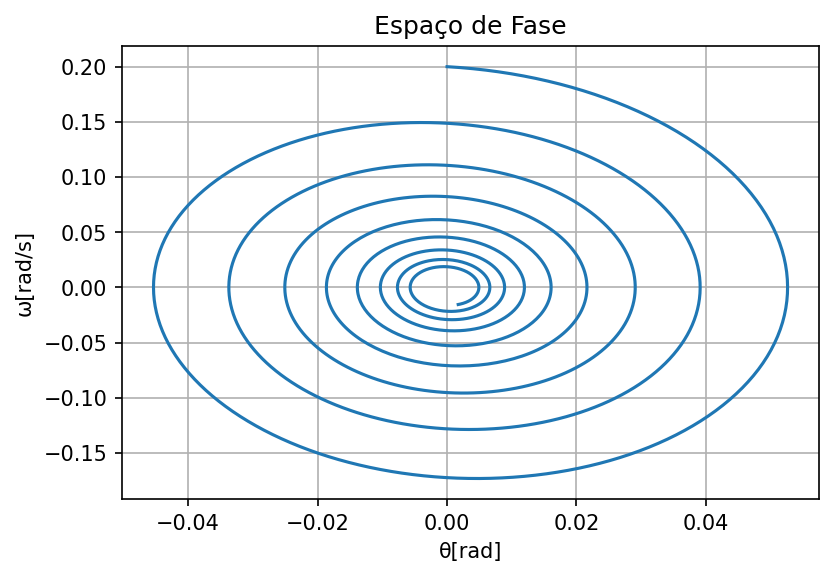

In [72]:
plt.figure(dpi=150)
plt.plot(X[:,0],X[:,1])
plt.xlabel(xstr)
plt.ylabel(vstr)
plt.title('Espaço de Fase')
plt.grid(True)